In [9]:
#ffmpeg installed?
#install librosa on anaconda
import librosa                    
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [10]:
DIR = './test_songs/'

def save_img(file):
    image_name = './' + (file.split('/')[2][:-4]) + "_BnW"
    print(image_name)
    n_mels = 128
    hop_length = 512
    n_fft = 2048

    file_location = file
    y, sr = librosa.load(file_location, duration=30.0)
    song,_ = librosa.effects.trim(y)

    S = librosa.feature.melspectrogram(song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    S_DB[S_DB < -40] = -40
    plt.figure(figsize=(432/80, 288/80), dpi=80)
    disp = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.axis('off')
    plt.savefig('./test_songs/images/'+image_name)
    plt.close()

    finale_name = './test_songs/images/'+image_name+'.png'
    img = cv2.imread(finale_name,0)
    cv2.imwrite(finale_name, crop_borders(img))
    
files = os.listdir('./test_songs')
songs = [ img for img in files if img.split('.')[-1] == 'mp3']
print(songs)

for song in songs:
    print(DIR + song)
    save_img(DIR + song)

['abba.mp3', 'desakato.mp3', 'elfinde.mp3', 'iseo.mp3', 'marley.mp3', 'metallica.mp3', 'paradise.mp3', 'requiem.mp3', 'sultans.mp3', 'wutang.mp3']
./test_songs/abba.mp3
./abba_BnW
./test_songs/desakato.mp3
./desakato_BnW
./test_songs/elfinde.mp3
./elfinde_BnW
./test_songs/iseo.mp3
./iseo_BnW
./test_songs/marley.mp3
./marley_BnW
./test_songs/metallica.mp3
./metallica_BnW
./test_songs/paradise.mp3
./paradise_BnW
./test_songs/requiem.mp3
./requiem_BnW
./test_songs/sultans.mp3
./sultans_BnW
./test_songs/wutang.mp3
./wutang_BnW


In [2]:
def crop_borders(img,x1=35,x2=252,y1=54,y2=389):
    '''Corta los bordes blancos creados por matplotlib'''
    cropped = img[x1:x2,y1:y2]
    return cropped

In [3]:
def save_mel(file, directory):
    '''Guarda la imagen del espectograma de mel'''
    n_mels = 128
    hop_length = 512
    n_fft = 2048

    file_location = file
    y, sr = librosa.load(file_location, duration=30.0)
    song,_ = librosa.effects.trim(y)

    S = librosa.feature.melspectrogram(song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    S_DB[S_DB < -40] = -40
    plt.figure(figsize=(432/80, 288/80), dpi=80)
    disp = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.axis('off')
    plt.savefig(directory)
    plt.close()

In [4]:
def cut_n_save(file, flag = 1):
    '''Guarda y vuelve a guardar en su ubicacion'''
    img = cv2.imread(file,flag)
    cv2.imwrite(file, crop_borders(img))

In [5]:
def ensure_dir(file_path):
    '''Asegura que exista el path, si no lo crea'''
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

['abba.mp3', 'desakato.mp3', 'elfinde.mp3', 'iseo.mp3', 'marley.mp3', 'metallica.mp3', 'paradise.mp3', 'requiem.mp3', 'sultans.mp3', 'wutang.mp3']
./test_songs/abba.mp3
./abba_BnW
./test_songs/desakato.mp3
./desakato_BnW
./test_songs/elfinde.mp3
./elfinde_BnW
./test_songs/iseo.mp3
./iseo_BnW
./test_songs/marley.mp3
./marley_BnW
./test_songs/metallica.mp3
./metallica_BnW
./test_songs/paradise.mp3
./paradise_BnW
./test_songs/requiem.mp3
./requiem_BnW
./test_songs/sultans.mp3
./sultans_BnW
./test_songs/wutang.mp3
./wutang_BnW


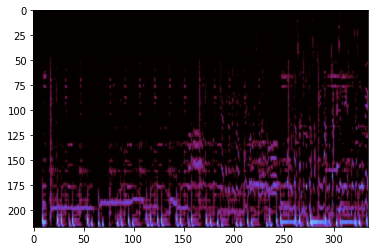

In [8]:
IMG = './data/images_original'
MUSIC = './data/genres_original'
DIR = './dataset/'

for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if(filename != "./data/genres_original\jazz\jazz.00054.wav"): #corrupted
            genre = filename.split('\\')[-2]
            fn = filename.split('\\')[-1].split('.')

            target = fn[0] + fn[1] + '.png'

            output = DIR + genre + '/' + target

            #ensure_dir(output)
            #save_mel(filename, output)
            #cut_n_save(output)